In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from functools import partial
from collections import deque
%matplotlib inline
from scipy.integrate import RK45, solve_ivp

In [80]:
class Small_Pendulum:
    def __init__(self, m, l, g=9.81, initial_theta=0, initial_omega=0):
        self.m = m # mass of the pendulum
        self.l = l # length of the pendulum
        self.g = g # gravitational acceleration
        
        self.t = 0 # time
        
        coef = np.sqrt(g/l) # coefficient for the equation of motion
        self.theta = lambda t = self.t : initial_omega / coef * np.sin(coef * t) + initial_theta * np.cos(coef * t) # theta(t)
        self.omega = lambda t = self.t : initial_omega * np.cos(coef * t) - coef * initial_theta * np.sin(coef * t) # omega(t)
        self.alpha = lambda t = self.t : -coef * initial_omega * np.sin(coef * t) - g / l * initial_theta * np.cos(coef * t) # alpha(t)
        
        self.x = lambda t = self.t : self.l*np.sin(self.theta(t)) # x position
        self.y = lambda t = self.t : -self.l*np.cos(self.theta(t)) # y position
        self.v_x = lambda t = self.t : self.l*self.omega(t)*np.cos(self.theta(t)) # x velocity
        self.v_y = lambda t = self.t : self.l*self.omega(t)*np.sin(self.theta(t)) # y velocity
        self.a_x = lambda t = self.t : -self.g*np.sin(self.theta(t)) # x acceleration
        self.a_y = lambda t = self.t : self.g*np.cos(self.theta(t)) # y acceleration
    
    def update(self, dt):
        self.t += dt
        
    def x_y_time(self, t_start , t_end, dt):
        t = np.arange(t_start, t_end, dt)
        x = np.array([self.x(i) for i in t])
        y = np.array([self.y(i) for i in t])
        return x, y, t
    

In [81]:
pend = Small_Pendulum(1, 1, initial_theta=np.pi/6, initial_omega=0)

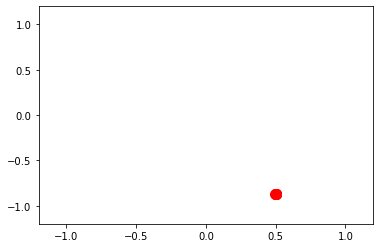

In [82]:
# creating a blank window
# for the animation
fig = plt.figure()
axis = plt.axes(xlim =(-1.2, 1.2),
                ylim =(-1.2, 1.2))
 
line, = axis.plot([], [], lw = 2, color = 'red', marker = 'o', markersize = 10)
 
# what will our line dataset
# contain?
def init():
    line.set_data([], [])
    return line,


# animation function
def animate(i, start = 0, end = 0.05):
    # t is a parameter which varies
    # with the frame number

    x, y, _ = pend.x_y_time(start + i/100, end + i/100, 0.01)
    # x, y values to be plotted
     
    # appending values to the previously
    # empty x and y data holders

    line.set_data(x, y)
    
    return line,
 
# calling the animation function    
anim = animation.FuncAnimation(fig, animate,
                            init_func = init,
                            frames = 200,
                            interval = 20,
                            blit = True)
anim.save('pend.mp4', writer = 'ffmpeg', fps = 30)

In [190]:
def solve_pendulum_ivp(t_start, t_end, dt, initial_state = [np.pi/6, 0], g = 9.81, l = 1):
    t = np.arange(t_start, t_end, dt)
    sol = solve_ivp(lambda t, y : [-g/l * y[1], np.sin(y[0])], [t_start, t_end], initial_state, t_eval=t)
    
    return sol.t, np.arcsin(sol.y[1]), sol.y[0], -g/l * sol.y[1]


class Pendulum:
    def __init__(self, m=1, l=1, g=9.81, initial_theta=0, initial_omega=0, time = 10, dt = 0.01):
        self.m = m # mass of the pendulum
        self.l = l # length of the pendulum
        self.g = g # gravitational acceleration

        
        # pendulum equation: theta'' + g/l * sin(theta) = 0
        sol = solve_ivp(lambda t, y : [y[1], -g/l * np.sin(y[0])], [0, time], [initial_theta, initial_omega], t_eval=np.arange(0, time, dt))
        
        self.t = sol.t
        self.thetas = sol.y[1]
        self.omegas = sol.y[0]
        self.alphas = -g/l * sol.y[1]
        
        self.x = self.l*np.sin(self.thetas) # x position
        self.y = -self.l*np.cos(self.thetas) # y position
        

In [191]:
pen = Pendulum(initial_theta=-np.pi/6, time = 1)

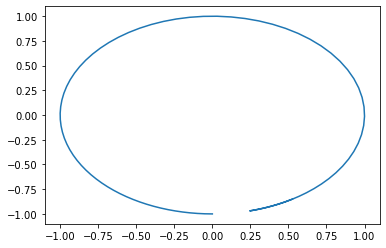

In [192]:
plt.plot(pen.x, pen.y)

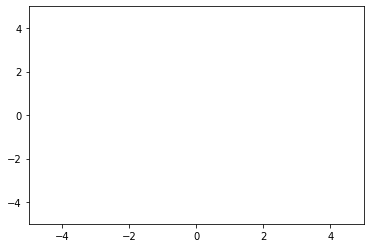

In [193]:
fig = plt.figure()
axis = plt.axes(xlim =(-5,5),
                ylim =(-5, 5))
 
line, = axis.plot([], [], lw = 2, color = 'red', marker = 'o', markersize = 10)
 
# what will our line dataset
# contain?
def init():
    line.set_data([], [])
    return line,


# animation function
def animate(i):
    x, y = pen.x[max(0, i - 5):i] , pen.y[max(0, i - 5):i]

    line.set_data(x, y)
    
    return line,
 
# calling the animation function    
anim = animation.FuncAnimation(fig, animate,
                            init_func = init,
                            frames = 300,
                            interval = 20,
                            blit = True)
anim.save('pend.mp4', writer = 'ffmpeg', fps = 30)